<a href="https://colab.research.google.com/github/mingshey/python_projects/blob/main/Polyfit_%EC%98%88%EC%A0%9C_%EC%9B%90%EC%9D%98_%EB%A9%B4%EC%A0%81_%EC%95%84%EB%A5%B4%ED%82%A4%EB%A9%94%EB%8D%B0%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Polyfit 예제3 - 원의 면적**

Archimedes 방법으로 원의 면적 구하기.

<img src="https://drive.google.com/uc?id=1q1SbpSc3dXAIcPTQi4Z1WTVO79HCXnO1"
 height=300 width=300 >  <img src="https://drive.google.com/uc?id=1pEZgiQwvrNu8ZwJOWaHz-OPTbqSc8pTy"
 height=300 width=300 >

아르키메데스의 방식을 따라 원의 면적의 근삿값을 구해 보겠습니다. 먼저 주어진 원의 중심각을 6등분하는 직선들을 작도합니다.
이 직선들이 원을 자르며 지나가는 점들을 찾고, 이 점들을 연결한 현들로 둘러싸인 내접(inscribing) 정육각형을 작도합니다.
다음으로, 위의 현들에 평행한 접선들로 둘러싸인 외접(circumscribing) 정육각형을 작도합니다.
내접 정육각형의 면적을 $A_{0}$, 외접 정육각형의 면적을 $B_{0}$라 놓은 다음, 중심각을 차례로 2등분해 나가며 원의 면적의 근삿값을 몇 차례 구하고, 외삽법을 이용하여 $n$이 무한대가 될 때의 값을 추측할 계획입니다.

반지름 $R$인 원의 중심각을 $n=6\times 2^{k}$ 등분한 부채꼴 중 하나에서 반지름과 현으로 둘러싸인 삼각형 한 개의 넓이를 $A_{k}$, 이 삼각형에서 현의 길이의 $\dfrac{1}{2}$을 $S_{k}$이라 하고, 원의 중심에서 현의 중심을 잇는 선분의 길이를 $C_{k}$이라 하면
$$ A_{k} = C_{k}\times S_{k} $$ 이고, 이 삼각형들의 넓이의 합, 즉 내접 정다각형의 면적은 $n A_{k}$ 입니다.

다른 한 편, 반지름의 연장선과 접선으로 둘러싸인 삼각형 한 개의 넓이를 $B_{k}$라 합니다. 접선이 반지름의 연장선을 길이 $X_{k}$로 잘라낸다고 하고, 반지름의 연장선은 이 접선을 접점으로부터 길이 $T_{k}$가 되도록 자른다고 하면 이웃한 두 반지름의 연장선 사이에 낀 삼각형 하나의 면적은 $$B_{k} = R \times T_{k}$$이며, 외접다각형 전체의 면적은 $n B_{k}$입니다.

중심각을 1번 더 2등분하면 각각의 내접 삼각형에 덧붙여져 증가된 면적은 $$ \Delta A_{k} = A_{k+1}-A_{k}=(R-C_{k})\times S_{k} $$이고, 전체 면적 증가는 $n\Delta A_{k}$입니다.

반면, 외접 다각형의 꼭지점 근처에서 잘려나간 삼각형의 면적은 $$-\Delta B_{k} = (X_{k}-R)\times T_{k+1}$$인데, 여기서 $$T_{k+1} = \dfrac{R(X_{k}-R)}{T_{k}}$$이고, 외접 다각형의 총 면적 변화는 $ n \Delta B_{k}$입니다.

내접 삼각형의 다음 번 증가분, 즉 $\Delta A_{k+1}$의 반복계산에 사용할 $S_{k+1}$과 $C_{k+1}$은 각각
$$\begin{align}
S_{k+1} &= \dfrac{1}{2}\sqrt{(R-C_{k})^2+S_{k}^2},\\[10pt]
C_{k+1}&=\sqrt{R^2-S_{k+1}^2}.
\end{align}
$$
이고, 외접 삼각형의 다음 번 감소분 계산에 사용할 $X_{k+1}$, $T_{k+1}$은 각각
$$\begin{align}
T_{k+1}&= \dfrac{R(X_{k}-R)}{T_{k}},\\[10pt]
X_{k+1}&=\sqrt{R^2+T_{k+1}^2}.
\end{align}
$$입니다.

반복 계산을 무한히 계속하면 내접다각형과 외접다각형은 각각 원의 면적에 수렴할 것으로 기대되지만, 우리는 컴퓨터가 무한 번의 계산을 마칠 때까지 기다릴 수 없으므로 몇 개의 $k$에 대하여 $k$번째 단계에서 구한 면적을 $x=6/n$의 함수 $A(x)$, $B(x)$로 간주하고 그것을 다항함수 $PFA(x)$, $PFB(x)$로 근사한 다음, $k\rightarrow\infty$, 즉 $x\rightarrow 0$일 때의 극한값을 $PFA(0)$, $PFB(0)$의 값으로 근사하여 구합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
R=1
x=[1.0]
S =1/2*R
C=np.sqrt(3)/2*R
T=R/np.sqrt(3)
X=np.sqrt(R**2+T**2)
n=[6]
A = [n[-1]*C*S]
B = [n[-1]*R*T]

for k in range(10):
  x.append(x[-1]/2)
  V=R-C
  W=X-R
  DA = V*S
  T = R*W/T
  DB = -W*T
  A.append(A[-1]+n[-1]*DA)
  B.append(B[-1]+n[-1]*DB)
  S=np.sqrt(V**2 + S**2)/2
  C=np.sqrt(R**2 - S**2)
  X=np.sqrt(R**2+T**2)
  n.append(2*n[-1])
k

9

In [ ]:
x

[1.0,
 0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625]

In [ ]:
n

[6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144]

In [ ]:
A

[2.598076211353316,
 3.0,
 3.105828541230249,
 3.132628613281238,
 3.139350203046867,
 3.1410319508905093,
 3.1414524722854615,
 3.141557607911857,
 3.141583892148318,
 3.14159046322805,
 3.1415921059992713]

In [ ]:
B

[3.4641016151377553,
 3.215390309173473,
 3.1596599420975005,
 3.146086215131435,
 3.142714599645368,
 3.1418730499798233,
 3.141662747056848,
 3.141610176604689,
 3.1415970343215256,
 3.1415937487713514,
 3.141592927385096]

In [ ]:
"""
마지막으로 구한 면적 값과 실제 원의 면적과의 상대 오차:
"""
print(f"Relative error of A[{k}]= {(A[-1]-np.pi*R**2)/np.pi:.2g}")
print(f"Relative error of B[{k}]= {(B[-1]-np.pi*R**2)/np.pi:.2g}")

Relative error of A[9]= -1.7e-07
Relative error of B[9]= 8.7e-08


예측할 수 있는 바 대로, A의 값은 원의 면적에 비해 작은 쪽에서, B의 값은 큰 쪽에서 원의 면적에 다가가고 있음을 볼 수 있습니다.

In [ ]:
"""
다항식 맞춤 계수
Polynomial Fitting Coefficients
"""
pcA = np.polyfit(x, A, k)
pcB = np.polyfit(x, B, k)
print(pcA)
print(pcB)

[ 2.67360949e-04 -5.19791874e-04  3.51303962e-04 -9.20362160e-04
  1.25746528e-05  3.14827615e-02  1.98314868e-08 -5.74190309e-01
  7.23779204e-13  3.14159265e+00]
[ 4.33896928e-04 -3.43744180e-04  4.56290460e-04  3.36897790e-03
  1.57898303e-05  3.14825712e-02  2.52884894e-08  2.87095154e-01
  1.31093189e-12  3.14159265e+00]


In [ ]:
"""
다항식 맞춤 함수
"""
pfA = np.poly1d(pcA)
pfB = np.poly1d(pcB)
print(f"pfA(x) = \n{pfA}\n")
print(f"pfB(x) = \n{pfB}\n")

pfA(x) = 
           9             8             7             6             5
0.0002674 x - 0.0005198 x + 0.0003513 x - 0.0009204 x + 1.257e-05 x
            4             3          2
 + 0.03148 x + 1.983e-08 x - 0.5742 x + 7.238e-13 x + 3.142

pfB(x) = 
           9             8             7            6             5
0.0004339 x - 0.0003437 x + 0.0004563 x + 0.003369 x + 1.579e-05 x
            4             3          2
 + 0.03148 x + 2.529e-08 x + 0.2871 x + 1.311e-12 x + 3.142



In [ ]:
xs = np.linspace(-0.2,1.2,100)
yAs = pfA(xs)
yBs = pfB(xs)

In [ ]:
pfA(0), pfB(0)

(3.141592653589795, 3.141592653589795)

In [ ]:
Ref=np.pi*R**2
print(f"Relative Error of pfA(0)= {(pfA(0)-Ref)/Ref:.2g}")
print(f"Relative Error of pfB(0)= {(pfB(0)-Ref)/Ref:.2g}")

Relative Error of pfA(0)= 5.7e-16
Relative Error of pfB(0)= 5.7e-16


내접다각형과 외접다각형이 직접 계산할 때는 원의 면적보다 작은 쪽과 큰 쪽에서 각각 수렴하지만, 외삽법을 적용했을 때는 같은 방향으로 편향된 외삽값을 주는 것을 볼 수 있습니다. 따라서 두 값을 평균한다고 해도 더 좋은 근삿값을 구할 수는 없겠습니다.

Text(0.5, 1.0, 'Area of a Circle; R=1')

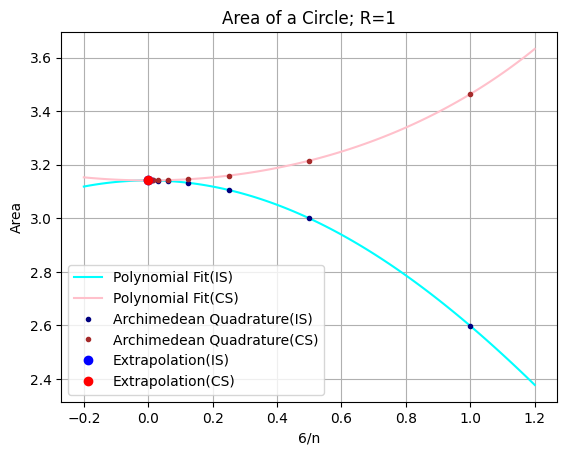

In [ ]:
plt.plot(xs,yAs,color="cyan")
plt.plot(xs,yBs,color="pink")
plt.plot(x,A,".",color="navy")
plt.plot(x,B,".",color="brown")
plt.plot([0],[pfA(0)],"bo")
plt.plot([0],[pfB(0)],"ro")
plt.grid()
plt.xlabel("6/n")
plt.ylabel("Area")
plt.legend(["Polynomial Fit(IS)","Polynomial Fit(CS)","Archimedean Quadrature(IS)","Archimedean Quadrature(CS)","Extrapolation(IS)","Extrapolation(CS)"])
plt.title(f"Area of a Circle; R={R:.2g}")

현대에 와서는 Chudnovsky 알고리즘 등을 이용하여 $\pi$의 값을 수십억 자리까지 구할 수 있으니 원의 면적이나 $\pi$ 값을 구하는 방법으로서는 위 방법이 그다지 인상적이지 않을 수도 있습니다. 그러나 여기서는 직접 계산에 의한 값보다 훨씬 정밀한 값을 외삽법에 의하여 구할 수 있다는 점에 주목하기 바랍니다. 직접 계산에 의하면 아르키메데스의 방법으로 $\pi$ 값을 소숫점 아래 6짜리까지 정확하게 구할 수 있는 데 비해, 같은 결과를 가지고 외삽법을 사용하여 정확한 자릿수를 2배 이상 증가시킬 수 있었습니다. 직접 계산에만 의존했다면 훨씬 많은 횟수의 계산이 필요했을 것입니다. 컴퓨터로는 직접 다룰 수 없는 극한 값을 외삽법을 이용하여 상당한 정확도로 추측할 수 있다는 것이 외삽법의 장점입니다.
물론 극한값이 없이 발산하는 사례에는 적용하기 어려울 것이므로 외삽법이 만능은 아닐 것이지만, 상당히 많은 분야에 사용할 수 있는 훌륭한 도구임에는 틀림없습니다.